<h2 style="color:green;">Non-Profit Organization's Grants Allocation</h2>

This is an analysis mode of how an NGO can ask for donor contribution.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# importing dataset
country = pd.read_csv('country.csv')

In [3]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Data Preprocessing
# Handle missing values
country.dropna(inplace=True)

In [5]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
country.shape

(167, 10)

In [7]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(country.drop(['country'], axis=1))

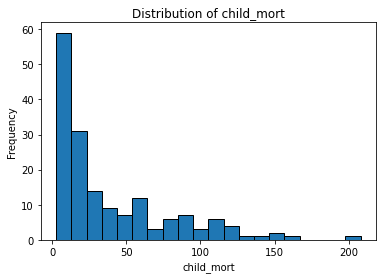

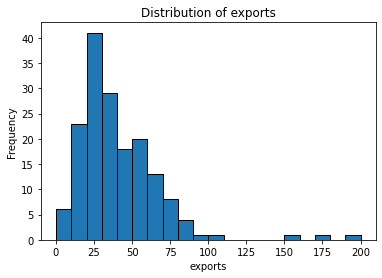

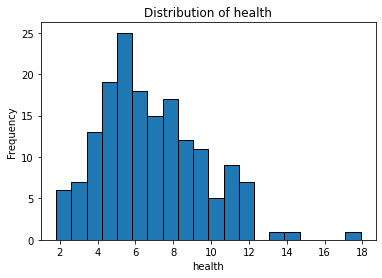

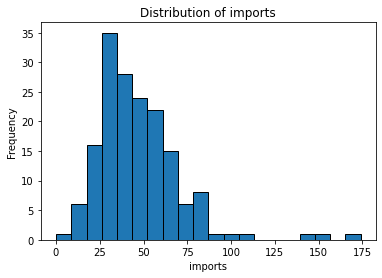

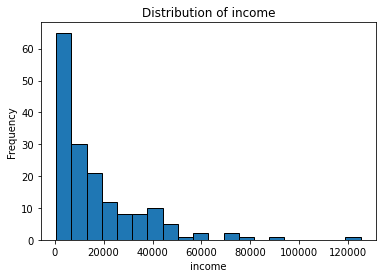

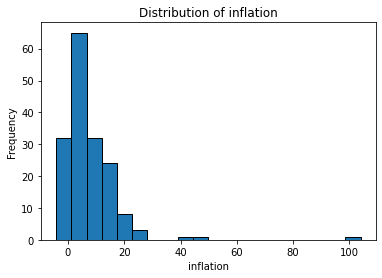

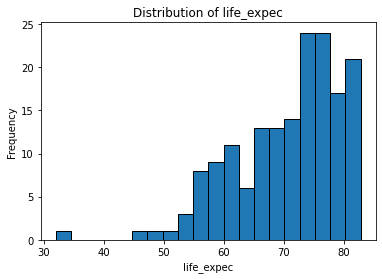

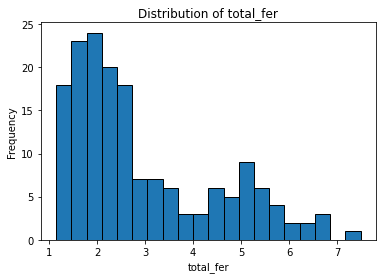

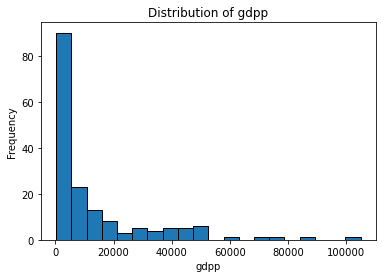

In [8]:
# Exploratory Data Analysis
# Visualize distribution of features
for feature in country.columns[1:]:
    plt.figure(figsize=(6, 4))
    plt.hist(country[feature], bins=20, edgecolor='k')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
# Categorizing Countries
country['poverty_category'] = np.where(country['gdpp'] < 1000, 'High Poverty', 'Low Poverty')
country['health_category'] = np.where(country['health'] < 500, 'Poor Health', 'Good Health')
country['life_expectancy_category'] = np.where(country['life_expec'] > 70, 'High Life Expectancy', 'Low Life Expectancy')
country['fertility_category'] = np.where(country['total_fer'] > 5, 'High Fertility', 'Low Fertility')
country['inflation_category'] = np.where(country['inflation'] > 10, 'High Inflation', 'Low Inflation')

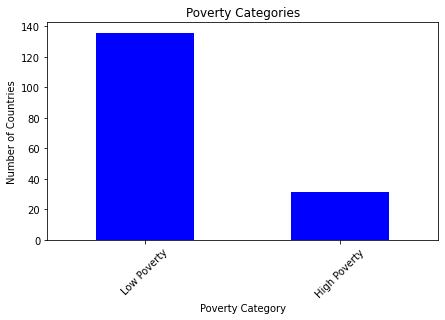

In [10]:
# Visualization 
plt.figure(figsize=(7, 4))
poverty_counts = country['poverty_category'].value_counts()
poverty_counts.plot(kind='bar', color='blue')
plt.title('Poverty Categories')
plt.xlabel('Poverty Category')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Ranking or Scoring - Example: Calculate a composite score
country['composite_score'] = (
    country['gdpp'] + country['income'] - country['child_mort'] - country['inflation']
) / 4

<h3 style="color:blue;">Ranking of Countries in terms of GDP</h3>

In [12]:
# Rank the top 10 poorest countries based on gdpp in ascending order
top_poorest_countries = country.sort_values(by='gdpp', ascending=True).head(10)

# Print the top 10 poorest countries
print("Top 10 Poorest Countries based on GDP per capita:")
print(top_poorest_countries[['country', 'gdpp']])

Top 10 Poorest Countries based on GDP per capita:
                      country  gdpp
26                    Burundi   231
88                    Liberia   327
37           Congo, Dem. Rep.   334
112                     Niger   348
132              Sierra Leone   399
93                 Madagascar   413
106                Mozambique   419
31   Central African Republic   446
94                     Malawi   459
50                    Eritrea   482


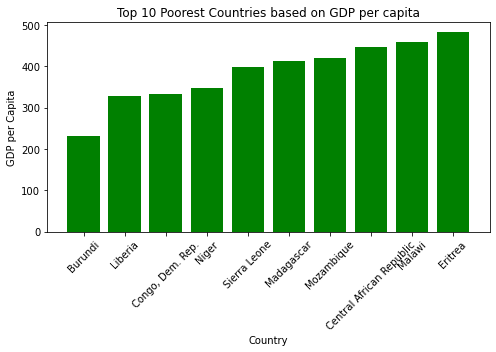

In [13]:
# Plot a bar chart for the top 10 poorest countries
plt.figure(figsize=(7, 5))
plt.bar(top_poorest_countries['country'], top_poorest_countries['gdpp'], color='green')
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.title('Top 10 Poorest Countries based on GDP per capita')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

These are top 10 poorest countries in terms of gdp. 

In [14]:
# Rank the top 10 poorest countries based on gdpp in ascending order
top_richest_countries = country.sort_values(by='gdpp', ascending=False).head(10)

# Print the top 10 poorest countries
print("Top 10 Richest Countries based on GDP per capita:")
print(top_richest_countries[['country', 'gdpp']])

Top 10 Richest Countries based on GDP per capita:
           country    gdpp
91      Luxembourg  105000
114         Norway   87800
145    Switzerland   74600
123          Qatar   70300
44         Denmark   58000
144         Sweden   52100
7        Australia   51900
110    Netherlands   50300
73         Ireland   48700
159  United States   48400


These are top 10 richest countries in terms of gdp. 

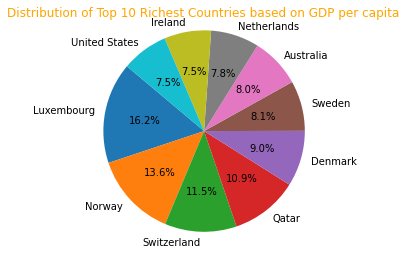

In [15]:
# Plot a pie chart of the top 10 richest countries based on GDP per capita
plt.figure(figsize=(4, 4))
plt.pie(top_richest_countries['gdpp'], labels=top_richest_countries['country'], autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Top 10 Richest Countries based on GDP per capita", color="orange")  # Set title color to orange
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<h3 style="color:blue;">Ranking of Countries in terms of health</h3>

In [16]:
# Rank the top 10 countries with worst health based on 'health' in ascending order
top_worst_health_countries = country.sort_values(by='health', ascending=True).head(10)


In [17]:
# Print the top 10 poorest countries
print("Top 10 countries with worst health based on 'health':")
print(top_worst_health_countries[['country', 'health']])

Top 10 countries with worst health based on 'health':
          country  health
123         Qatar    1.81
107       Myanmar    1.97
116      Pakistan    2.20
38    Congo, Rep.    2.46
154  Turkmenistan    2.50
70      Indonesia    2.61
82         Kuwait    2.63
50        Eritrea    2.66
115          Oman    2.77
23         Brunei    2.84


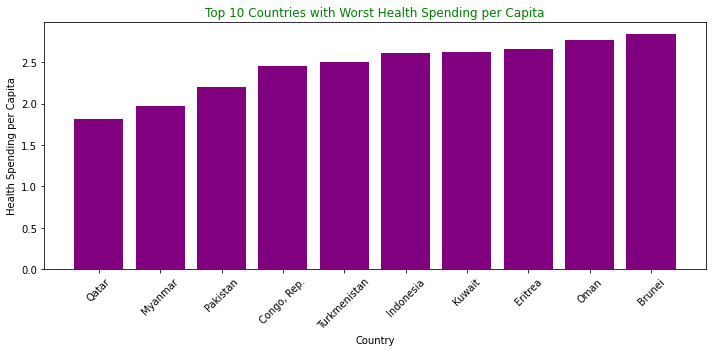

In [18]:
# Plot a bar chart for the top 10 countries with worst health
plt.figure(figsize=(10, 5))
plt.bar(top_worst_health_countries['country'], top_worst_health_countries['health'], color='purple')
plt.xlabel('Country')
plt.ylabel('Health Spending per Capita')
plt.title('Top 10 Countries with Worst Health Spending per Capita', color='green')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Rank the top 10 countries with best health based on 'health' in ascending order
top_best_health_countries = country.sort_values(by='health', ascending=False).head(10)

In [20]:
# Print the top 10 richest countries in erms of health
print("Top 10 countries with best health based on 'health':")
print(top_best_health_countries[['country', 'health']])

Top 10 countries with best health based on 'health':
                   country  health
159          United States    17.9
101  Micronesia, Fed. Sts.    14.2
132           Sierra Leone    13.1
110            Netherlands    11.9
54                  France    11.9
88                 Liberia    11.8
102                Moldova    11.7
58                 Germany    11.6
26                 Burundi    11.6
145            Switzerland    11.5


Above are countries with the best health system

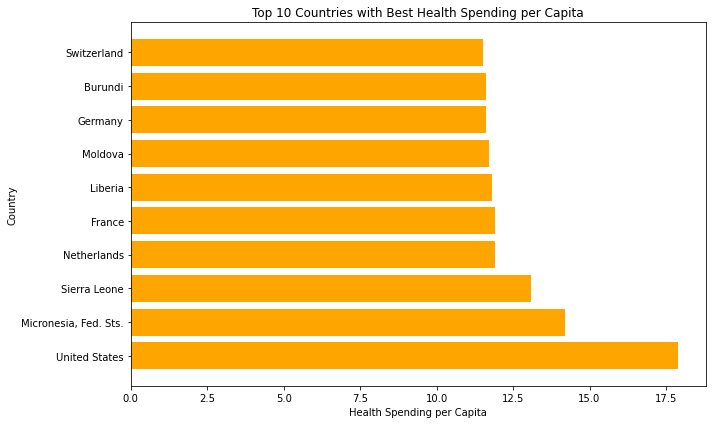

In [21]:
# Plot a horizontal bar chart for the top 10 countries with best health
plt.figure(figsize=(10, 6))
plt.barh(top_best_health_countries['country'], top_best_health_countries['health'], color='orange')
plt.xlabel('Health Spending per Capita')
plt.ylabel('Country')
plt.title('Top 10 Countries with Best Health Spending per Capita')
plt.tight_layout()
plt.show()

<h3 style="color:blue;">Conclusion</h3>

From above visualizations and analytics most third world countries are in abject poverty and they require aid from developed countries for them to be updated in terms of health matters and general communal wellness.

<h2 style="color:green;">End</h2>